In [304]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/song-popularity/dataset.csv


In [305]:
# читаем файл
data = pd.read_csv ('/kaggle/input/song-popularity/dataset.csv')

In [306]:
# выводим таблицы
data.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


Смотрим какие столбцы и с каким типом данных содержит наш датасет

In [307]:
# Вывод типs данных в таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11


## Значение столбцов таблицы в dataset
##### track_id - индификатор трека
##### artist - имена артистов, испольняющих трекa
##### album_name - название альбома
##### track_name - название трека из альбома
##### popularity - популярность трека(от 0 до 100, где 100 - самый поулярный трек. Основывается на общем прослушивании трека и даты реализации)
##### Популярность артистов и их альбомов оценивается исходя от популярности трека
##### duration_ms - длительность трека(милисекунды)
##### explicit - откровенность трека( True - да, False - нет или данных нет)
##### danceability - оценка уровня пригодности трека для танцев под него ( 0.0 - не подходит, 1.0 - подходит)
##### energy - мера интентивсности трека ( 0.0 - медленные и спокойные треки, 1.0 - быстрые и громкие)
##### key - ключ трека ( числа соответсвуют нотам)
##### loudness - громкость трека в децибелахmode - модальность трека ( 1 - мажор, 0 - минор)
##### speechiness - оценка уровня слов в треке ( 1.0 - сплошной текст, 0.0 - текст отсутствует полность)
##### acousticness - акустический ли трек (1 - да, 0 - нет)
##### instrumentalness - Оценка вероятности того, что трек является инструментальным (0.0 — не инструментальный, 1.0 — инструментальный)
##### liveness - Оценка вероятности того, что трек записан в живом исполнении (0.0 — нет, 1.0 — да)
##### valence - Оценка эмоционального состояния трека (0.0 — отрицательные эмоции, 1.0 — положительные эмоции)
##### tempo - темп трека (обычно в ударах в минуту)
##### time_signature - Подпись времени трека (например, 4/4, 3/4 и т. д.)
##### track_genre - жанр трека



Проверим наличие пропусков среди данных

In [308]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Оказалось что в нашем датасете только 3  пропуска, поэтому я решила их просто удалить, ведь она не будут играть главной роли при таком большом количестве входных данных

In [309]:
# удаляем пропуски
data = data.dropna()

# Проверка успешно ли выполнена функция удаления
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

На данном этапе я решила удалить первый столбец, так как он не содрежит в себе никакой важной информации для анализа

In [310]:
#Удаления столбца Unnamed
data = data.drop(data.columns[0], axis=1)

Для удоства и лучшей визуализации данных представила данные столбца с длительностью трека в минутах с округлением, а так же переименовала соответствующий столбец

In [311]:
#Преобразование столбца с длительностью из миллисекунд в минуты
def ms_to_min(ms):
    return round(ms/(1000*60), 1)

data['duration_ms'] = data['duration_ms'].apply(ms_to_min)

# переименовываю столбец, для того, чтобы его название отражало суть данных
data = data.rename(columns={'duration_ms': 'duration_min'})

Проверим наш датасет на правильность выполнения команд выше

In [312]:
data. head(3)

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


### Начало EDA и Feature Engineering

#### 1. Первое, что я сделала, это проверила как длительность песни влияет на ее популярность и восприятие аудитории

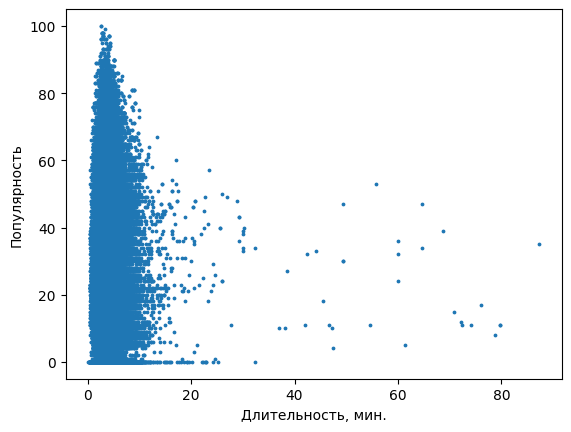

In [313]:
import matplotlib.pyplot as plt

plt.scatter(data['duration_min'], data['popularity'], s=3)
plt.xlabel('Длительность, мин.')
plt.ylabel('Популярность')
plt.show()

Вывод: Проанализируя данные на графике можно сделать вывод, что самыми популярными среди слушателей стали музыкальные композиции длительностью от 0  до 20 минут. Ниже я решила посмотреть распределение в более узком диапазоне, чтобы точнее определить савое популярное время длительности песен


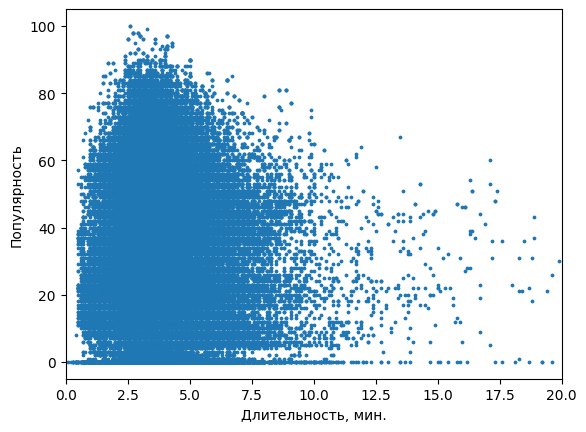

In [314]:
plt.scatter(data['duration_min'], data['popularity'], s=3)

plt.xlabel('Длительность, мин.')
plt.xlim(0, 20) 
plt.ylabel('Популярность')

plt.show()

Вывод: самые популярные треки находятся в районе 2,5 - 5 минут

#### 2. Здесь мы посмотрим на самые популярные и непопулярные треки, что поможет на лучше определить предпочтения слушателей

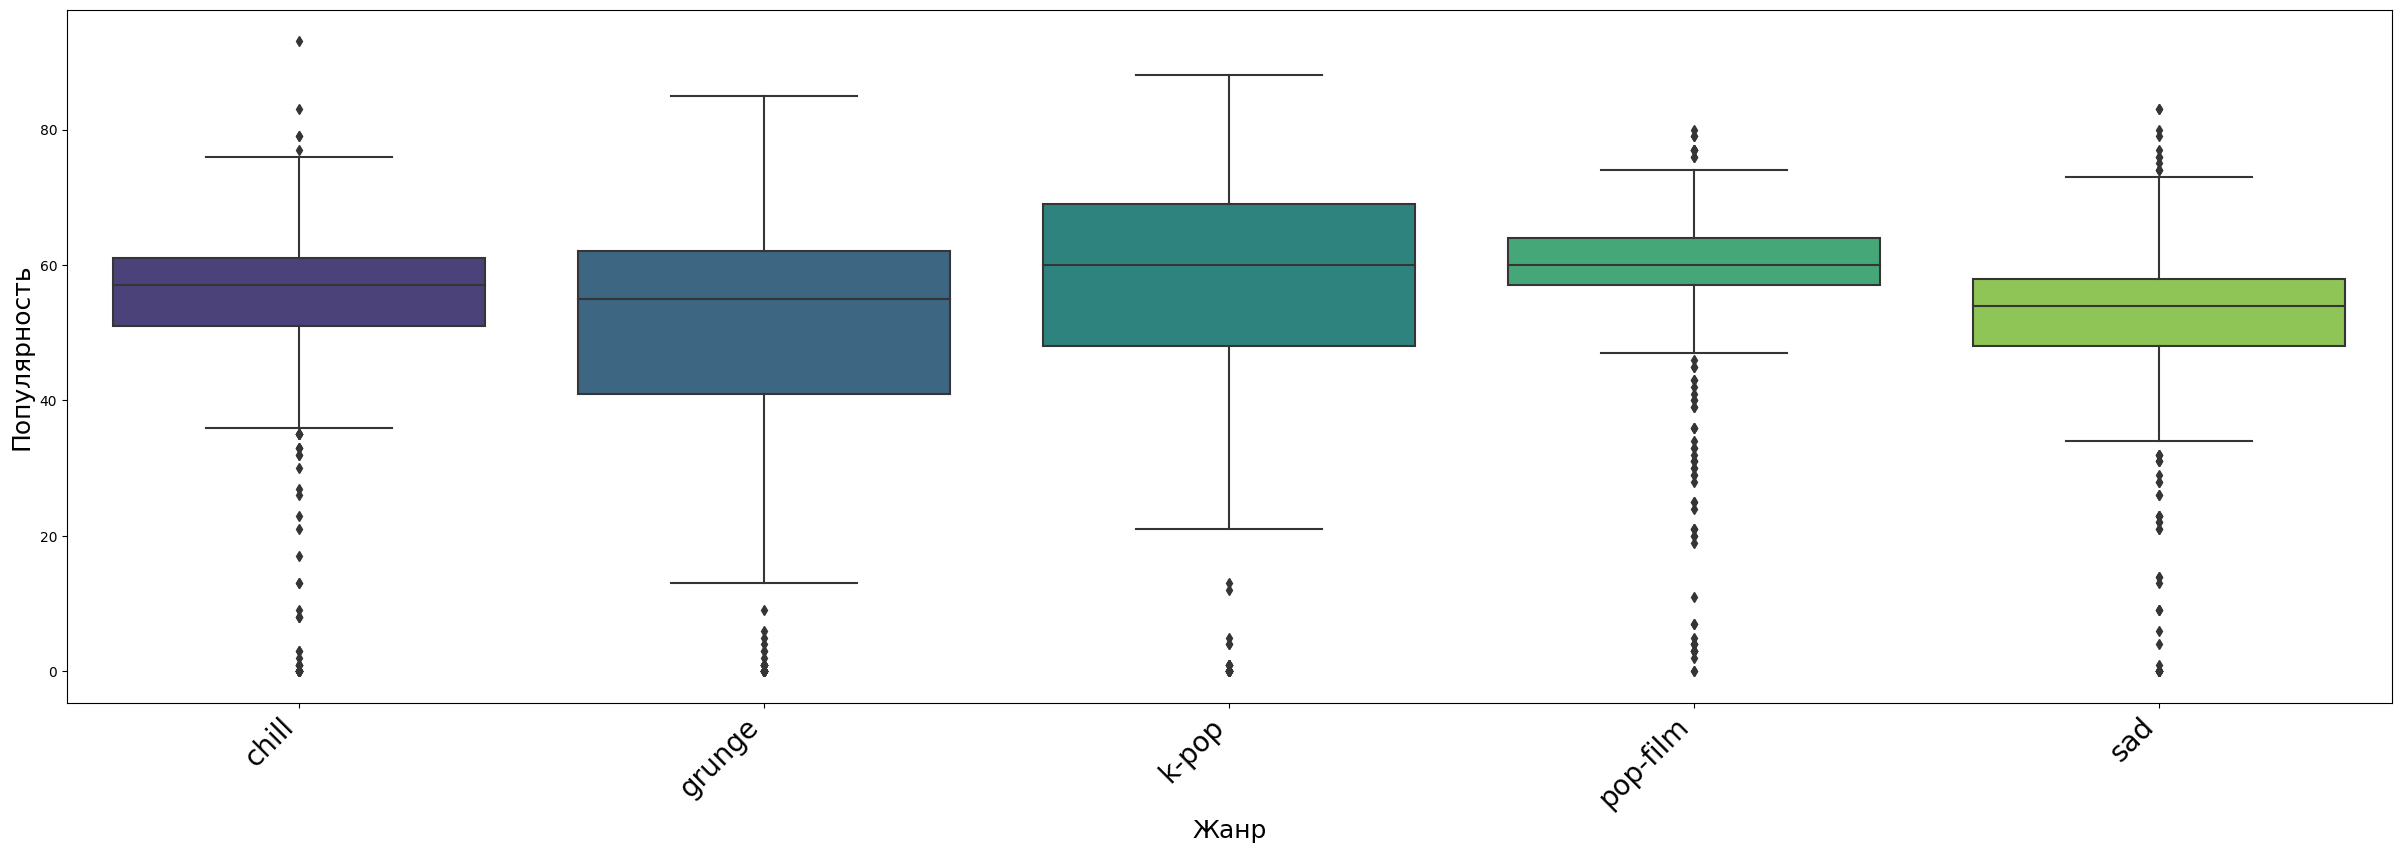

Index(['pop-film', 'k-pop', 'chill', 'sad', 'grunge'], dtype='object', name='track_genre')

In [315]:
average_popularity = data.groupby('track_genre')['popularity'].mean()

# Получение топ-5 жанров по средней популярности
top_5_genres = average_popularity.nlargest(5).index
sort_data = data[data['track_genre'].isin(top_5_genres)]

plt.figure(figsize=(30, 9))


sns.boxplot(data=sort_data, x='track_genre', y='popularity', palette='viridis')

plt.xlabel('Жанр', fontsize=18)
plt.ylabel('Популярность', fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=20)
plt.show()
top_5_genres

Вывод: самыми популярными стали такие жанры как pop-film, k-pop, chill, sad,grunge (у них самый малеьнкий разброс по оценкам популярности среди всех песен жанра)

#### 3. Влияне танцевальности на популярность

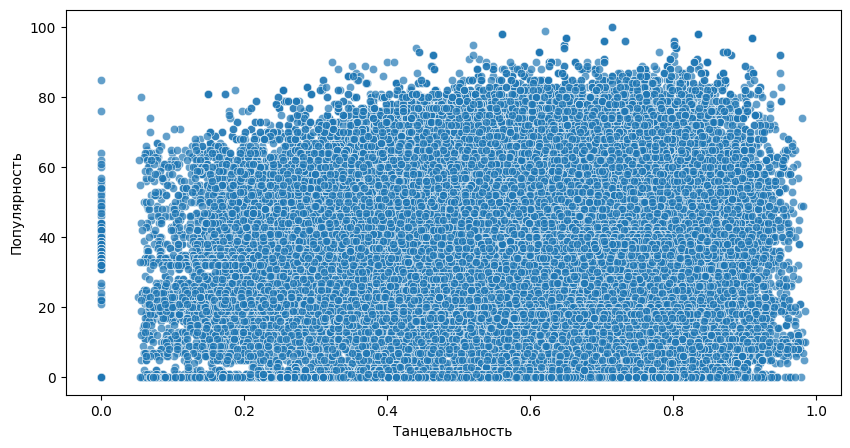

In [316]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=data, x='danceability', y='popularity', sizes=(20, 200), alpha=0.7, palette='viridis')

plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.show()

Вывод: график получился не очень удачным,ведь по нем нельзя выделить особую закономерность распределения популярности среди песен с разной танцевательность. Например, некоторые мелодии могут быть популярные среди слушателей, но танцевать под них не хочется.

#### 4. С жанрами разобрались, теперь стоит посмотреть самый популярных исполнителей, здесь я буду смотреть рейтинг 10

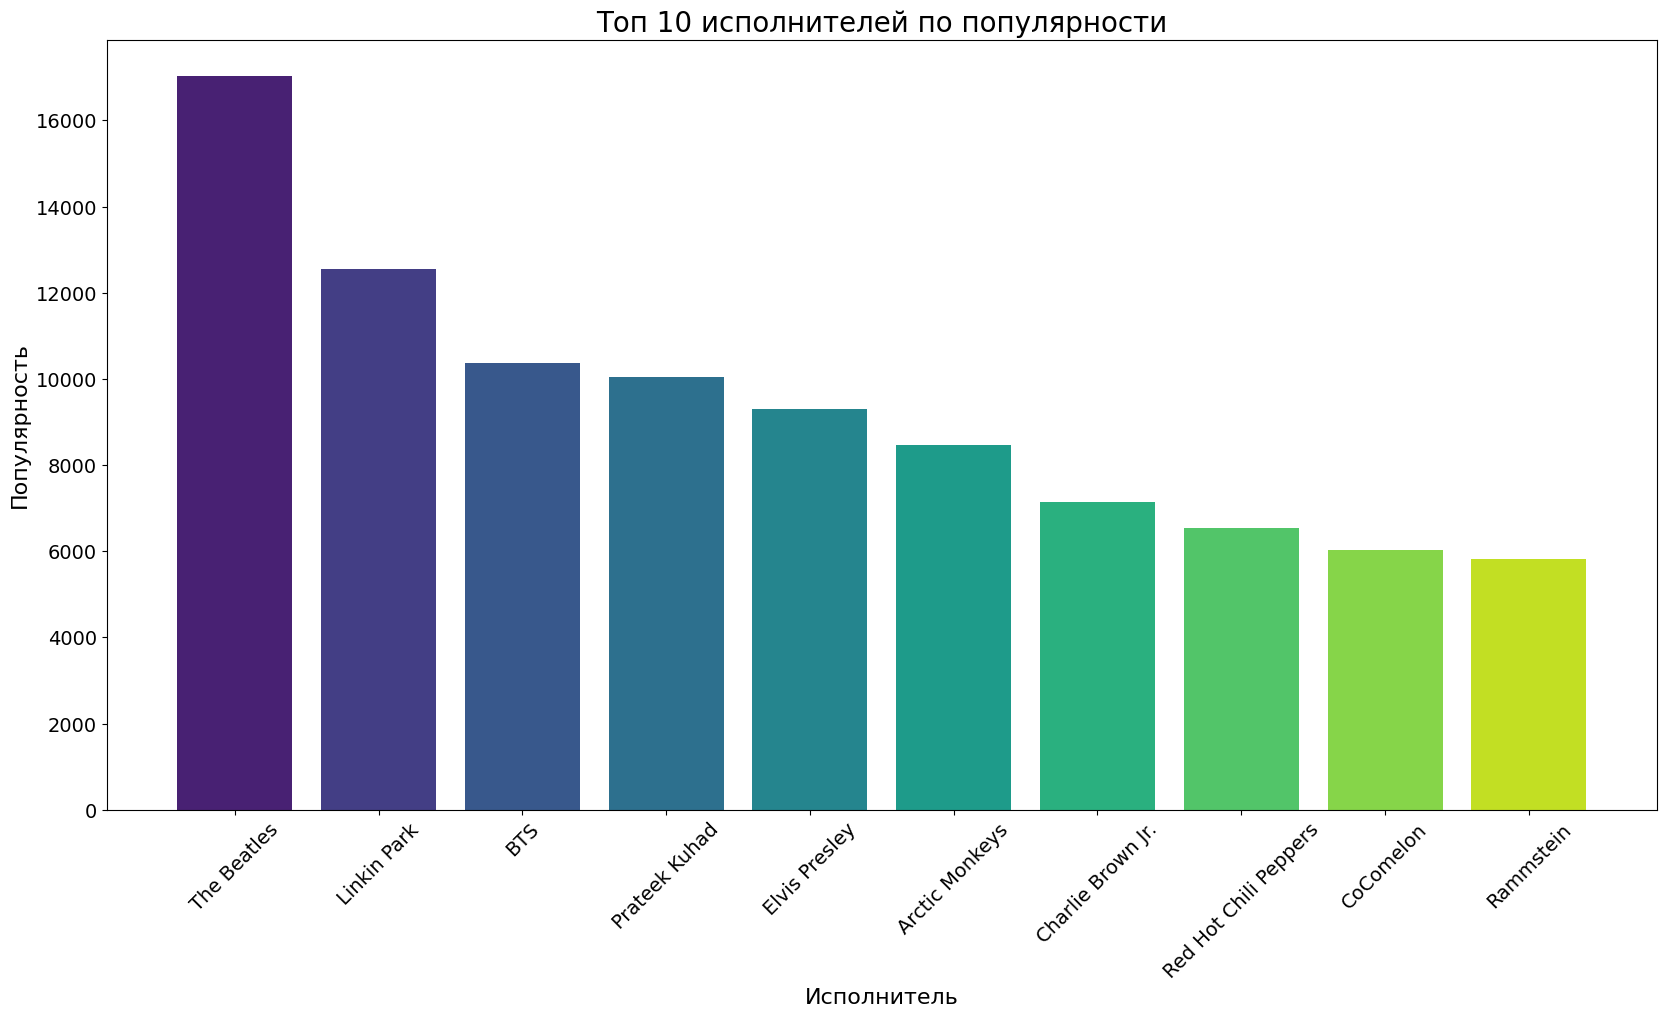

,popularity
artists,
The Beatles,17021
Linkin Park,12560
BTS,10358
Prateek Kuhad,10054
Elvis Presley,9307
Arctic Monkeys,8461
Charlie Brown Jr.,7136
Red Hot Chili Peppers,6540
CoComelon,6023


In [317]:
popular_artists = data.groupby('artists')['popularity'].sum()
top_10 = pd.DataFrame(popular_artists.sort_values(ascending=False).head(10))

plt.figure(figsize=(20, 10))

colors = sns.color_palette('viridis', len(top_10))

plt.bar(top_10.index, top_10['popularity'], color=colors)

plt.xlabel('Исполнитель', fontsize=16)
plt.ylabel('Популярность', fontsize=16)
plt.title('Топ 10 исполнителей по популярности', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)


plt.show()
top_10

Вывод: самые популярные исполнители представлены выше

#### 7. Посмотрим как влияет наличие откровенного контента в песнях на ее популярность ( как много песен с наличием такого контента)

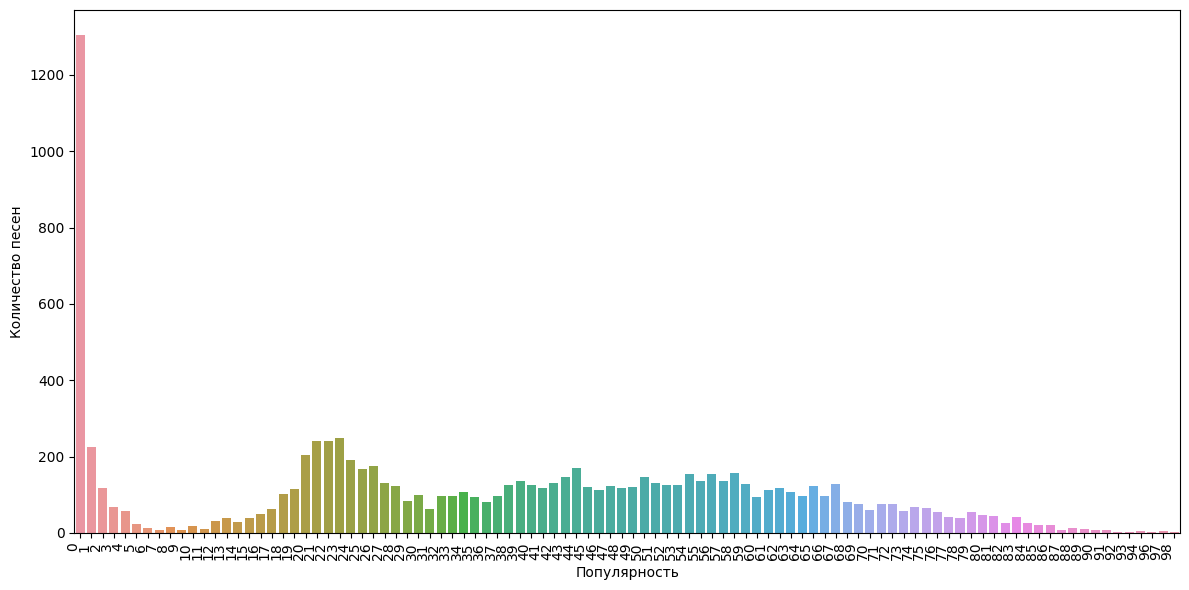

In [318]:
import seaborn as sns

explicit_songs = data[data['explicit'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(x='popularity', data=explicit_songs, order=sorted(explicit_songs['popularity'].unique()))

plt.xlabel("Популярность")
plt.ylabel("Количество песен")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

Вывод: можно сделать вывод, что самые популярные песни не содержат откровенного контента, скорее всего это связано с тем, что такие песни слушают люди разных возрастных категорий

#### 6. Теперь проанализируем распределение значения колонок, отвечающих за характеристику песен.

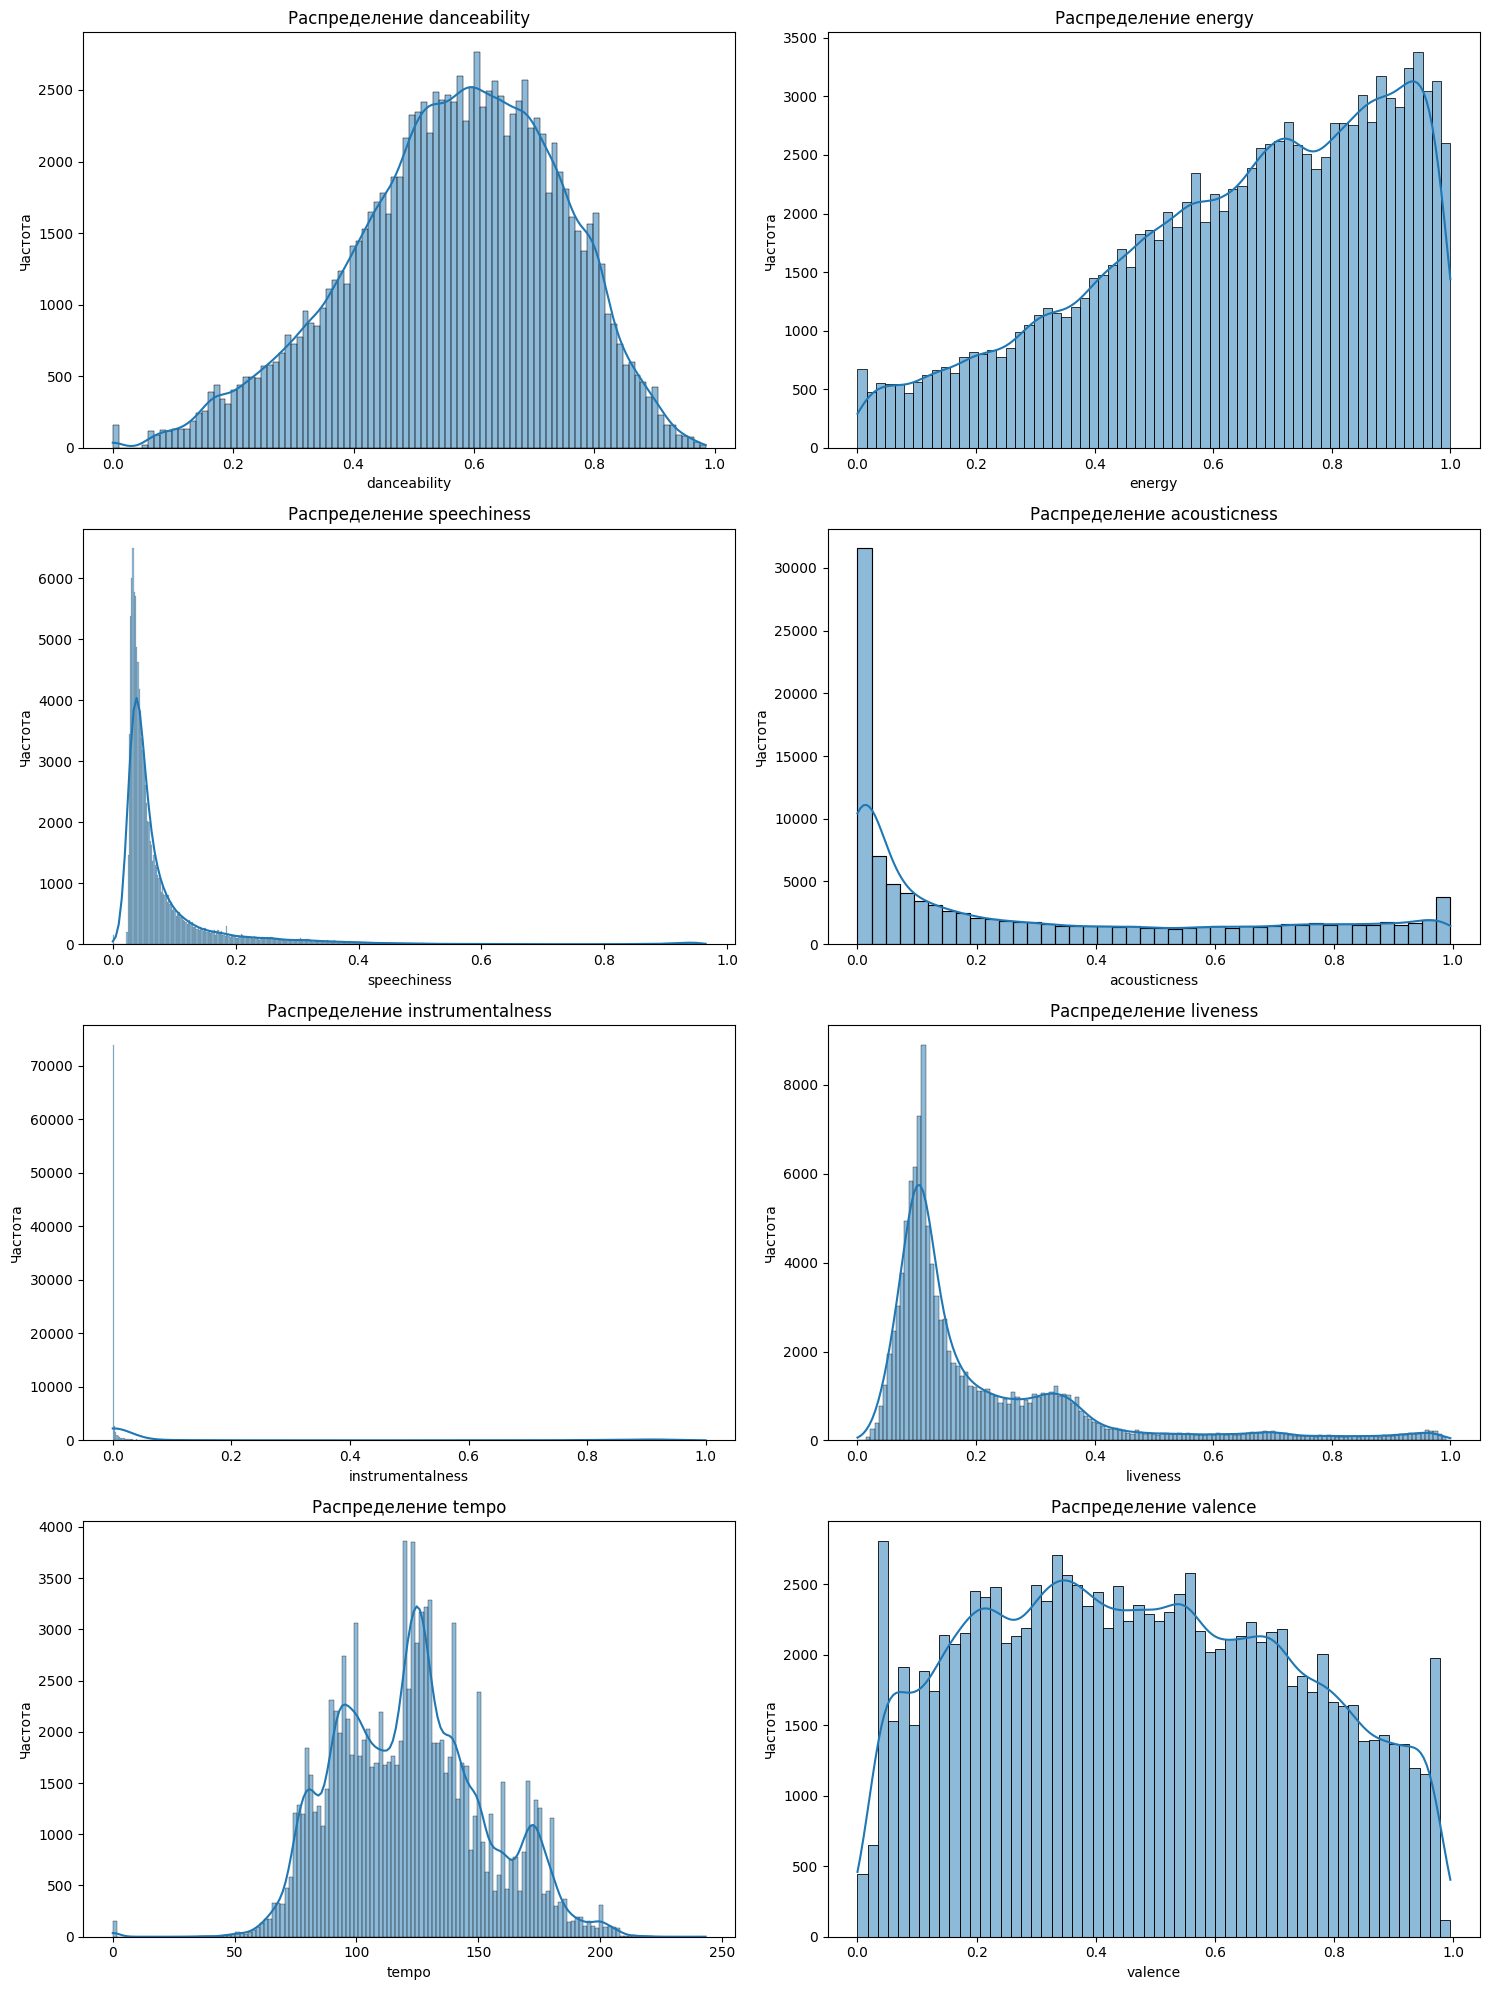

In [319]:
import warnings

warnings.filterwarnings("ignore")

columns = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'valence']

num_plots = len(columns)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    sns.histplot(data[col], ax=ax, kde=True)
    ax.set_title(f'Распределение {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')


plt.tight_layout()
plt.show()

Вывод: теперь мы можем увидеть более подробно как распределяются значения по характеристикам песен, обратить внимание стоит на то, что инструментальная характеристика принимает минимальные значения, поэтому я решила удалить столбец, который не дает нам никакой информации,но я хочу на фоне этого удаления добавить новый столбец с отношением длительности песни к ее инструментальному соотношению, чтобы совсем не выбросить из учета инструментал песен

In [320]:
data['avg_tempo_per_min'] = data['tempo'] / data['duration_min']

Необходимо так же разделить сольных исполнителей от фитов, это я сделла с помощью функции ниже

In [321]:
def check(artists):
    artists = artists.split(';') 
    if len(artists) > 1:
        return 0
    return 1

data['solo'] = data['artists'].apply(check_names)
data.head(15)

,track_id,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,avg_tempo_per_min,solo
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,3.8,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,23.136053,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.5,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,30.995600,1
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.5,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,21.809143,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.4,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,53.452941,1
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,3.3,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,36.348182,1
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,3.6,False,0.688,0.4810,6,...,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,27.226944,1
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,3.8,False,0.407,0.1470,2,...,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,37.180000,0
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,4.0,False,0.703,0.4440,11,...,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,37.740000,1
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,3.2,False,0.625,0.4140,0,...,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,40.652500,0
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,3.4,False,0.442,0.6320,1,...,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,23.205588,1


Займемся преобразованием категориальных признаков в числовие с помощью LabelEncoder

In [322]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

LE.fit(data['artists'].unique())
data['artists'] = LE.transform(data['artists'])

LE.fit(data['album_name'].unique())
data['album_name'] = LE.transform(data['album_name'])

LE.fit(data['track_name'].unique())
data['track_name'] = LE.transform(data['track_name'])

LE.fit(data['explicit'].unique())
data['explicit'] = LE.transform(data['explicit'])

LE.fit(data['track_genre'].unique())
data['track_genre'] = LE.transform(data['track_genre'])

Отлично, данные преобразовали, но остался id трека, я решила просто удалить этот столбец, так как он не несет какой либо информации по треку, кроме его идентификации и на популярность она не влияет

In [323]:
data = data.drop(['track_id'], axis=1)
data

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,avg_tempo_per_min,solo
0,10357,8100,11741,73,3.8,0,0.676,0.4610,1,-6.746,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0,23.136053,1
1,3287,14796,22528,55,2.5,0,0.420,0.1660,1,-17.235,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0,30.995600,1
2,12397,39162,60774,57,3.5,0,0.438,0.3590,0,-9.734,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0,21.809143,0
3,14839,8580,9580,71,3.4,0,0.266,0.0596,0,-18.515,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0,53.452941,1
4,5255,16899,25689,82,3.3,0,0.618,0.4430,2,-9.681,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0,36.348182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486,66,53329,21,6.4,0,0.172,0.2350,5,-16.393,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113,19.686719,1
113996,22486,66,65090,22,6.4,0,0.174,0.1170,0,-18.318,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113,13.318594,1
113997,4952,5028,38207,22,4.5,0,0.629,0.3290,0,-10.895,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113,29.417333,1
113998,18534,7238,21507,41,4.7,0,0.587,0.5060,7,-10.889,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113,28.927660,1


#### ОБЩИЙ ВЫВОД
Я провела анализ и выявила некоторые признаки относительно популярности треков и исполнителей, а так же преобразовала данные в числовой вид с помощью LabelEncoder

Создадим диаграмму корреляции, чтобы посмотреть как признаки зависят друг от друга

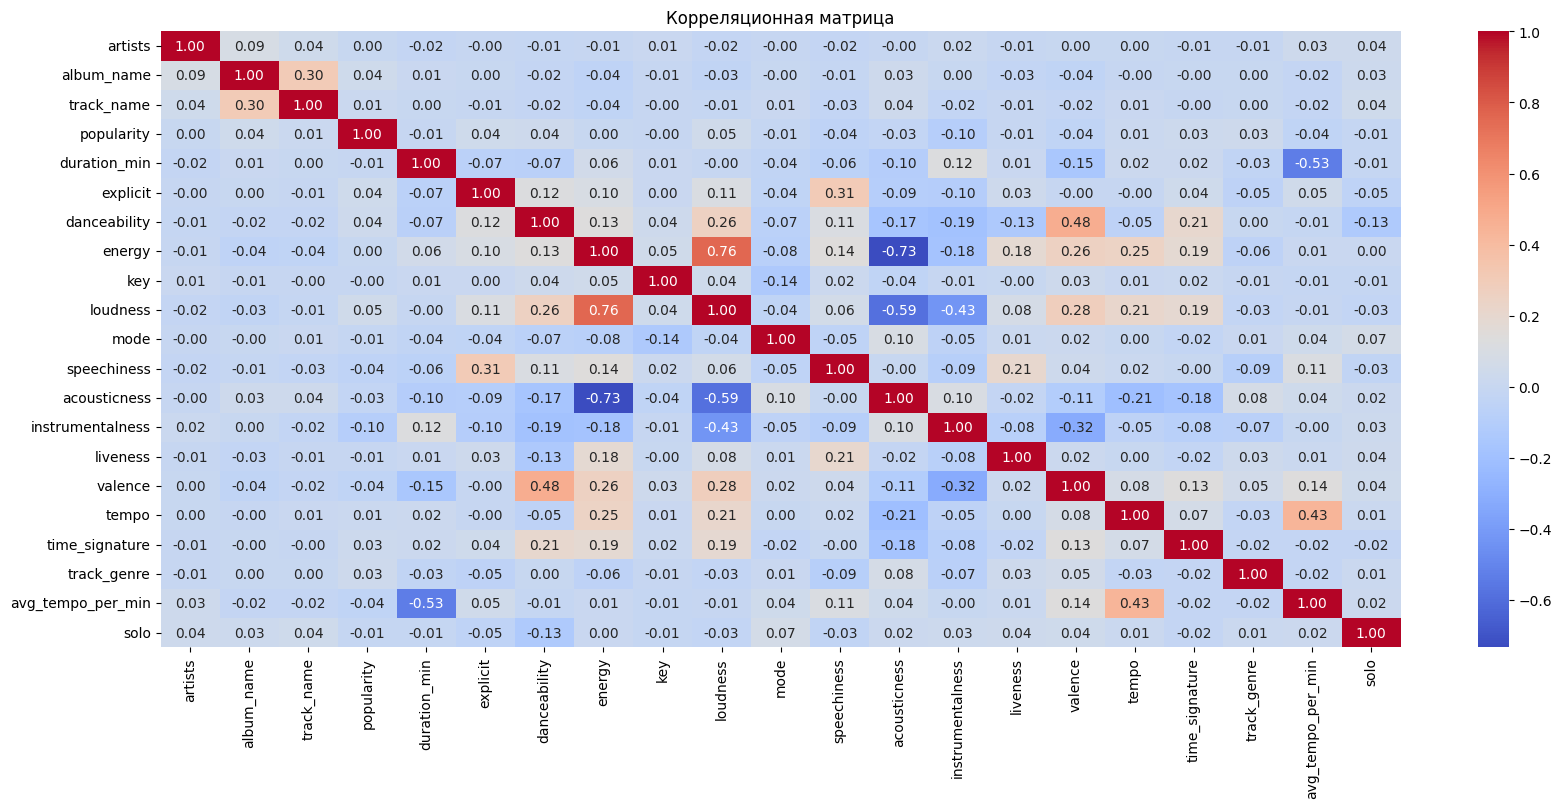

In [324]:
correlation_matrix = data.corr()

plt.figure(figsize=(20, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

ВЫВОД: в результате получаем, что популярность не коррелирует ни с одним признаком, из-за этого может быть тяжело предсказать популярность верно

Нормализауем данные для обучения с моделями

In [325]:
from sklearn.preprocessing import StandardScaler

scaled_data = data
scaler = StandardScaler().fit(data)

scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)


Разобьем датасет на обучающий и тестовый

In [326]:
from sklearn.model_selection import train_test_split

X = scaled_data.drop(['popularity'], axis=1)
y = scaled_data['popularity']

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True)

### Эксперементы с моделями машинного обучения

#### Модели для работы: LinearRegression, Random Forest Regressor, GradientBoostingRegressor


#### Метрики 
##### MAE - (cредняя абсолютная ошибка)значение абсолютной разницы между фактическими и прогнозируемыми значениями в наборе данных.
##### MSE - (cреднеквадратичная ошибка) значение квадратичной разницы между исходными и прогнозируемыми значениями в наборе данных.
##### RMSE - (квадратный корень из mse). Измеряет стандартное отклонение остатков.
##### r2 - Коэффициент детерминации , представляющий собой долю дисперсии зависимой переменной

Сравнивать и делать выводы по результатам я буду в конце

### Линейная регрессия 

In [327]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression().fit(x_train, y_train)
score_lr = model_1.score(x_test, y_test)
print(f'{score_lr} - R2 score')

0.029614474069524444 - R2 score


### Дерево

In [328]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model_2 = RandomForestRegressor(n_estimators=200, criterion='squared_error', max_depth=20, min_samples_split=15, min_samples_leaf=10, random_state=0)
model_2.fit(x_train, y_train)
score_rfr = model_2.score(x_test, y_test)
print(f'{score_rfr} - R2 score')

0.4733920690137172 - R2 score


### Градиентный бустинг

In [329]:
from sklearn.ensemble import GradientBoostingRegressor

model_3 = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=15,min_samples_split=15, min_samples_leaf=10,random_state=0)
model_3.fit(x_train, y_train)
score_gbl = model_3.score(x_test, y_test)
print(f'{score_gbl} - R2 score')

0.7052137184111844 - R2 score


И градиентый бустинг, и деревья показали довольно неплохие результаты, а линейна регрессия,показала худший, потому что модели тяжело определить принцип, по которому строится популярность у той или иной песни

### Градиентый бустинг  выявил лучший результат

теперь посмотрим на метрики данной модели

In [330]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model_3.predict(x_test)

# Вычисляем метрики
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)

MAE = mean_absolute_error(y_test, y_pred)
r2 = model_3.score(x_test, y_test) 

print(f'R-squared: {r2:.4f}')
print(f'MSE: {MSE:.4f}')
print(f'RMSE: {RMSE:.4f}')
print(f'MAE: {MAE:.4f}')

R-squared: 0.7052
MSE: 0.2941
RMSE: 0.8767
MAE: 0.3848


А теперь проводим кросс-валидацию для лучшей модели

In [331]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_3 = GradientBoostingRegressor(n_estimators=100, 
                                   learning_rate=0.1, 
                                   max_depth=10, 
                                   min_samples_split=15, 
                                   min_samples_leaf=10, 
                                   random_state=0)

kf = KFold(n_splits=5)

for fold_number, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = scaled_data['popularity'].iloc[train_index], scaled_data['popularity'].iloc[test_index]
    
    model_3.fit(X_train, y_train)
    
    y_pred = model_3.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = model_3.score(X_test, y_test)
    
    print(f"Номер обхода: {fold_number}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")

Номер обхода: 1
MSE: 0.79
MAE: 0.73
RMSE: 0.89
R-squared: 0.21
Номер обхода: 2
MSE: 0.67
MAE: 0.68
RMSE: 0.82
R-squared: 0.26
Номер обхода: 3
MSE: 1.02
MAE: 0.88
RMSE: 1.01
R-squared: 0.10
Номер обхода: 4
MSE: 1.14
MAE: 0.87
RMSE: 1.07
R-squared: -0.10
Номер обхода: 5
MSE: 0.77
MAE: 0.70
RMSE: 0.88
R-squared: 0.11


Результаты кросс-валидации : на 4 прохождении показтель r2 упал ниже нуля, не поняла почму так получилось не очень удовлетворительные. С одной стороны, я рад, что R2 ни упала ниже 0, с другой, в некоторых обходах она очень близка к 0, что означает, что модель справляется чуть лучше, чем просто предсказание среднего. Тем не менее, эта модель - лучший вариант из тех, которые есть. Остальные метрики не поднимались выше 0.23. Важно отметить, что кросс-валидацию я проводил на нормализованном датасете. Поэтому, как я понял, получились такие значения, так как в нормализованном датасете все значения маленькие.

### Общий вывод по всей работе
#### В процессе выполнения работы я проанализировала данные в датасете, выявила закономерности, после чего обучила три разные модели из библиотеки sklearn. Лучший результат из всех показал градиентный бустинг, с помощью него получилось лучший показатель r2